In [1]:
pip install -U fortran-magic

Requirement already up-to-date: fortran-magic in /usr/local/lib/python3.6/dist-packages (0.7)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%reload_ext fortranmagic

/usr/local/lib/python3.6/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [4]:
import py_compile
import math

In [5]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/me.jpg?raw=1" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [6]:
assert ran_the_first_cell, "Oh noes!"

In [7]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [8]:
lista=[3.14,'pi',3,'Miami',2.9,'si',True]
lista

[3.14, 'pi', 3, 'Miami', 2.9, 'si', True]

In [9]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [10]:
tercero=lista[2]
cuarto=lista[3]
print("third:", tercero)
print("fourth:", cuarto)

third: 3
fourth: Miami


In [11]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [12]:
ultimo=lista[-1]
penultimo=lista[-2]
print("ultimo:", ultimo)
print("penultimo:", penultimo)

ultimo: True
penultimo: si


In [13]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [14]:
lista_p=lista[2:4]
lista_p

[3, 'Miami']

In [15]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [16]:
primeros=lista[:3]
primeros

[3.14, 'pi', 3]

In [17]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [18]:
ultimos=lista[3:]
ultimos

['Miami', 2.9, 'si', True]

In [19]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [20]:
lista[3:5:1]

['Miami', 2.9]

In [21]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [22]:
lista[::-1]

[True, 'si', 2.9, 'Miami', 3, 'pi', 3.14]

In [23]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [24]:
print(lista)
lista.append('new')
print('lista+:',lista)

[3.14, 'pi', 3, 'Miami', 2.9, 'si', True]
lista+: [3.14, 'pi', 3, 'Miami', 2.9, 'si', True, 'new']


In [25]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [26]:
lista=[1, 2, 3, 5, 7 , 13]
[x+1 for x in lista]

[2, 3, 4, 6, 8, 14]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [27]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [28]:
diccionario={"Narrativo":["Cuento","Novela","Epopeya"],
             "Lirico":["Oda","Elegia","Satira"],
             "Dramatico":["Tragedia","Comedia"]}

In [29]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [30]:
diccionario["Ensayos"]=["Ensayo"]
print (diccionario["Ensayos"])

['Ensayo']


In [31]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [32]:
del diccionario['Ensayos']
diccionario

{'Dramatico': ['Tragedia', 'Comedia'],
 'Lirico': ['Oda', 'Elegia', 'Satira'],
 'Narrativo': ['Cuento', 'Novela', 'Epopeya']}

In [33]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pacino.gif?raw=1" alt="Drawing" style="width: 100%;"/></center>


In [34]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [35]:
y = [
        [1, 2, 3, 2],
        [4, 5, 6, 5], 
        [7, 8, 9, 1]   
    ]
x = [
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ]

In [36]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

In [37]:
def multiplicacion(X, Y):
    filas_i = len(X)
    columnas_i = len(Y[0])
    ret = [[0 for columnas in range(columnas_i)] for filas in range(filas_i)]
    print (ret)
    for i in range(filas_i):
        for j in range(columnas_i):
            for k in range(len(Y)):
                ret[i][j] += X[i][k] * Y[k][j]
    return ret

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/gross.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>


In [38]:
%%time

matmul(a, b)

CPU times: user 38 µs, sys: 6 µs, total: 44 µs
Wall time: 95.8 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [39]:
%%time

multiplicacion(x,y)

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
CPU times: user 99 µs, sys: 17 µs, total: 116 µs
Wall time: 106 µs


[[34, 44, 54, 30], [21, 27, 33, 20], [82, 101, 120, 45], [108, 135, 162, 72]]

In [40]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5889444069446815, 0.3695246622330062, 0.07530310660988804],
 [0.04161481613752993, 0.6376008329556025, 0.32999322833315214]]

In [41]:
def m_aleatoria(i, j):
    ret = []
    for fila in range(i):
        ret.append([random.random() for _ in range(j)])
    return ret

al = m_aleatoria(4, 4)
al

[[0.5217065659052595,
  0.31922164523381535,
  0.9019309267117941,
  0.47818428148187475],
 [0.010177555558933515,
  0.9110648984930618,
  0.4292721332832474,
  0.9705175884954084],
 [0.37135138965836056,
  0.9102152999832167,
  0.3258270563220058,
  0.674403567048114],
 [0.945297628521903,
  0.4522627766951113,
  0.7868258663027908,
  0.25142546618878725]]

In [42]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 5.76 s, sys: 11.7 ms, total: 5.77 s
Wall time: 5.79 s


In [43]:
%%time
ala=m_aleatoria(1000, 200)
alb=m_aleatoria(200, 1000)
alab=matmul(ala,alb)

CPU times: user 36.5 s, sys: 46.8 ms, total: 36.6 s
Wall time: 36.7 s


In [44]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [45]:
def producto_p(ap, bp):
    return sum(a * b for a, b in zip(ap, bp))

In [46]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [47]:
%%fortran
subroutine producto_f(ap, bp, ret)
    double precision, intent(in) :: ap(:)
    double precision, intent(in) :: bp(:)
    double precision, intent(out) :: ret
    
    ret = sum(ap * bp)
end

In [48]:
list_data = [int(i) for i in range(100000)]
array_data = np.array(list_data)

In [49]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.7 ms, sys: 9 µs, total: 11.8 ms
Wall time: 12 ms


333328333350000

In [50]:
%%time
producto_p(list_data,list_data)

CPU times: user 11.8 ms, sys: 0 ns, total: 11.8 ms
Wall time: 13.5 ms


333328333350000

In [51]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 1.96 ms, sys: 0 ns, total: 1.96 ms
Wall time: 1.88 ms


333328333350000.0

In [52]:
%%time
producto_f(array_data, array_data)

CPU times: user 1.15 ms, sys: 1 µs, total: 1.15 ms
Wall time: 1.1 ms


333328333350000.0

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/sloth.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [53]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [54]:
def mu(ap,bp):
  return[a * b for a, b in zip(ap, bp)]

mu([1,2,3,4,5,6],['a','b','c','d','e'])

['a', 'bb', 'ccc', 'dddd', 'eeeee']

In [55]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [56]:
nk = 'x % y ** z'
bc = compile(nk, '', 'eval')
import dis; dis.dis(bc)

  1           0 LOAD_NAME                0 (x)
              2 LOAD_NAME                1 (y)
              4 LOAD_NAME                2 (z)
              6 BINARY_POWER
              8 BINARY_MODULO
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/runaway.gif?raw=1" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/thisisfine.gif?raw=1" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [57]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [58]:
d = np.array([9, 8, 33, 64,82,7])
d

array([ 9,  8, 33, 64, 82,  7])

In [59]:
data + data

array([2, 4, 6, 8])

In [60]:
d * d

array([  81,   64, 1089, 4096, 6724,   49])

In [61]:
array_data=data

In [62]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 83 µs, sys: 1e+03 ns, total: 84 µs
Wall time: 89.2 µs


30

In [63]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 34 µs, sys: 1 µs, total: 35 µs
Wall time: 38.9 µs


30

In [64]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 28.4 µs


30.0

In [65]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [66]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [67]:
td=d.reshape(3,2)
td

array([[ 9,  8],
       [33, 64],
       [82,  7]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [68]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [69]:
a=d.reshape(3,2)
print("Arreglo:\n", a, sep='')
print("--------------")
print("DType:", a.dtype)
print("Shape:", a.shape)
print("Strides:", a.strides)
print("Data:", a.data.tobytes())

Arreglo:
[[ 9  8]
 [33 64]
 [82  7]]
--------------
DType: int64
Shape: (3, 2)
Strides: (16, 8)
Data: b'\t\x00\x00\x00\x00\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00!\x00\x00\x00\x00\x00\x00\x00@\x00\x00\x00\x00\x00\x00\x00R\x00\x00\x00\x00\x00\x00\x00\x07\x00\x00\x00\x00\x00\x00\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [70]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [71]:
arreglo=np.arange(25).reshape(5,5)
arreglo

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [72]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [73]:
arreglo**arreglo

array([[                   1,                    1,                    4,
                          27,                  256],
       [                3125,                46656,               823543,
                    16777216,            387420489],
       [         10000000000,         285311670611,        8916100448256,
             302875106592253,    11112006825558016],
       [  437893890380859375,                    0, -2863221430593058543,
         -497033925936021504,  6353754964178307979],
       [-2101438300051996672, -1595931050845505211,  4981753131911086080,
         8450172506621111015,                    0]])

In [74]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [75]:
np.sin(arreglo)

array([[ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ],
       [-0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849],
       [-0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736],
       [ 0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721],
       [ 0.91294525,  0.83665564, -0.00885131, -0.8462204 , -0.90557836]])

In [76]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [77]:
((arreglo+arreglo)%7)==1

array([[False, False, False, False,  True],
       [False, False, False, False, False],
       [False,  True, False, False, False],
       [False, False, False,  True, False],
       [False, False, False, False, False]])

In [78]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [79]:
(((arreglo+arreglo)%8)==1)|(arreglo>10)

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [80]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [81]:
arreglo@arreglo.T

array([[  30,   80,  130,  180,  230],
       [  80,  255,  430,  605,  780],
       [ 130,  430,  730, 1030, 1330],
       [ 180,  605, 1030, 1455, 1880],
       [ 230,  780, 1330, 1880, 2430]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [82]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [83]:
tans=np.tan(np.linspace(0,3.14,6,28))
exps=np.exp(np.linspace(0,3.14,6,28))
print(tans)
exps

[ 0.00000000e+00  7.26055969e-01  3.07102520e+00 -3.08772015e+00
 -7.28491019e-01 -1.59265494e-03]


array([ 1.        ,  1.87385911,  3.51134797,  6.57977138, 12.32956455,
       23.10386686])

In [84]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [85]:
exps[1]

1.8738591108247435

In [86]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [87]:
exps[:5]

array([ 1.        ,  1.87385911,  3.51134797,  6.57977138, 12.32956455])

In [88]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [89]:
tans[3:]

array([-3.08772015e+00, -7.28491019e-01, -1.59265494e-03])

In [90]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [91]:
exps[::1]

array([ 1.        ,  1.87385911,  3.51134797,  6.57977138, 12.32956455,
       23.10386686])

In [92]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [93]:
print(tans)
print(tans>=0)
print(tans[tans>=0])

[ 0.00000000e+00  7.26055969e-01  3.07102520e+00 -3.08772015e+00
 -7.28491019e-01 -1.59265494e-03]
[ True  True  True False False False]
[0.         0.72605597 3.0710252 ]


In [94]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [95]:
print(exps)
exps[[1,3,5]]

[ 1.          1.87385911  3.51134797  6.57977138 12.32956455 23.10386686]


array([ 1.87385911,  6.57977138, 23.10386686])

In [96]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [97]:
desorden = np.array([11, 29, 65, 12, 26,24, 55, 1, 15, 20])

In [98]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [99]:
i_orden=np.argsort(desorden)
i_orden

array([7, 0, 3, 8, 9, 5, 4, 1, 6, 2])

In [100]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [101]:
desorden[i_orden]

array([ 1, 11, 12, 15, 20, 24, 26, 29, 55, 65])

In [102]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [103]:
capital=np.array([64, 87, 90, 3, 83])
activos=np.array(['z', 'x', 'y', 'w', 'v'])

In [104]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [105]:
s_cap= np.argsort(capital)
activos[s_cap]

array(['w', 'z', 'v', 'x', 'y'], dtype='<U1')

In [106]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [107]:
print("Fechas:\n", repr(event_dates))
print("Valores:\n", repr(event_values))
print("Calendario:\n", repr(calendar))

Fechas:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Valores:
 array([10, 15, 20])
Calendario:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [108]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


In [109]:
print("Fechas brutas:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Fechas llenas:", calendar[calendar.searchsorted(event_dates)])

Fechas brutas: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Fechas llenas: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [110]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [111]:
arreglo

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [112]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [113]:
arreglo[:3,:3]

array([[ 0,  1,  2],
       [ 5,  6,  7],
       [10, 11, 12]])

In [114]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [115]:
arreglo [[[0,-1],[-1,0]],:2]

array([[[ 0,  1],
        [20, 21]],

       [[20, 21],
        [ 0,  1]]])

In [116]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [117]:
arreglo[arreglo[:,2]>=10]

array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [118]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [119]:
def std_variance(x):
  return math.sqrt(((x - x.mean()) ** 2).sum() / len(x))

In [120]:
variance(np.random.standard_normal(1000))

1.0442560250586352

In [121]:
std_variance(np.random.standard_normal(1000))

0.9511515660728938

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [122]:
data = np.arange(30)
data.mean()

14.5

In [123]:
arreglo=np.arange(50)
arreglo.mean()

24.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [124]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [125]:
arreglo=np.arange(50).reshape(10,5)
arreglo

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [126]:
data.mean()

14.5

In [127]:
arreglo.mean()

24.5

In [128]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [129]:
arreglo.mean(axis=1)

array([ 2.,  7., 12., 17., 22., 27., 32., 37., 42., 47.])

In [130]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [131]:
arreglo.max(axis=0)

array([45, 46, 47, 48, 49])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [132]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [133]:
fila=np.array([46, 345, 908, 123])
columna=np.array([[340],[53],[303]])
print("Fila:\n", fila)
print("Columna:\n", columna)

Fila:
 [ 46 345 908 123]
Columna:
 [[340]
 [ 53]
 [303]]


In [134]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [135]:
fila+columna

array([[ 386,  685, 1248,  463],
       [  99,  398,  961,  176],
       [ 349,  648, 1211,  426]])

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/broadcasting.png?raw=1" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [136]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [137]:

print("Matriz: \n",arreglo)
print("Media: \n",arreglo.mean)
print("Matriz-media: \n:",arreglo-arreglo.mean())

Matriz: 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]
Media: 
 <built-in method mean of numpy.ndarray object at 0x7f2b28e41170>
Matriz-media: 
: [[-24.5 -23.5 -22.5 -21.5 -20.5]
 [-19.5 -18.5 -17.5 -16.5 -15.5]
 [-14.5 -13.5 -12.5 -11.5 -10.5]
 [ -9.5  -8.5  -7.5  -6.5  -5.5]
 [ -4.5  -3.5  -2.5  -1.5  -0.5]
 [  0.5   1.5   2.5   3.5   4.5]
 [  5.5   6.5   7.5   8.5   9.5]
 [ 10.5  11.5  12.5  13.5  14.5]
 [ 15.5  16.5  17.5  18.5  19.5]
 [ 20.5  21.5  22.5  23.5  24.5]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/unicorn.jpg?raw=1" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/panda-wrangling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/pandas_logo.png?raw=1" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [138]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [139]:
f = pd.Series(index=['1','2','3','4','5','6'] , data=[124,456,603,475,678,936])
f

1    124
2    456
3    603
4    475
5    678
6    936
dtype: int64

In [140]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [141]:
print("indice: ",f.index)
print("valores: ",f.values)

indice:  Index(['1', '2', '3', '4', '5', '6'], dtype='object')
valores:  [124 456 603 475 678 936]


In [142]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [143]:
# ... or by label.
s.loc['a']

1

In [144]:
f.loc['3']

603

In [145]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [146]:
f.iloc[3:]

4    475
5    678
6    936
dtype: int64

In [147]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [148]:
f.loc[:'3']

1    124
2    456
3    603
dtype: int64

In [149]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [150]:
f.iloc[[2,3]]

3    603
4    475
dtype: int64

In [151]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [152]:
f.loc[200>=f]

1    124
dtype: int64

In [153]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [154]:
fus=pd.Series({'1':65.4,'2':45,'3':345.4,'4':6.123})
fus

1     65.400
2     45.000
3    345.400
4      6.123
dtype: float64

In [155]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [156]:
f+fus

1    189.400
2    501.000
3    948.400
4    481.123
5        NaN
6        NaN
dtype: float64

In [157]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [158]:
(f+fus).fillna(0.0)

1    189.400
2    501.000
3    948.400
4    481.123
5      0.000
6      0.000
dtype: float64

In [159]:
# Most real datasets are read in from an external file format.
pd.read_csv('/content/drive/My Drive/AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl = pd.read_csv('/content/drive/My Drive/AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [160]:
manzana=pd.read_csv('/content/drive/My Drive/AAPL.csv', parse_dates=['Date'], index_col='Date')
manzana.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-07-26,153.460007,153.460007,153.929993,153.059998,153.350006,15781000.0
2017-07-27,150.559998,150.559998,153.990005,147.300003,153.750000,32476300.0
2017-07-28,149.500000,149.500000,150.229996,149.190002,149.889999,17213700.0
2017-07-31,148.729996,148.729996,150.330002,148.130005,149.899994,19614200.0
2017-08-01,149.059998,149.059998,149.419998,148.410004,149.100006,13845589.0


In [161]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [162]:
manzana.iloc[:5,:5]

,Adj Close,Close,High,Low,Open
Date,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856


In [163]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [164]:
manzana.loc[pd.Timestamp('2016-12-22'):pd.Timestamp('2016-12-24'), ['High', 'Low']]

,High,Low
Date,,
2016-12-22,116.510002,115.639999
2016-12-23,116.519997,115.589996


# Rolling Operations

<center><img src="https://github.com/ssanderson/pydata-toolbox/blob/master/notebooks/images/rolling.gif?raw=1" alt="Drawing" style="width: 75%;"/></center>

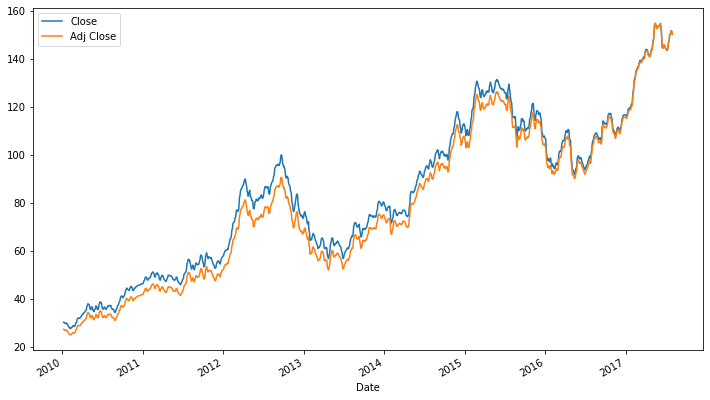

In [165]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

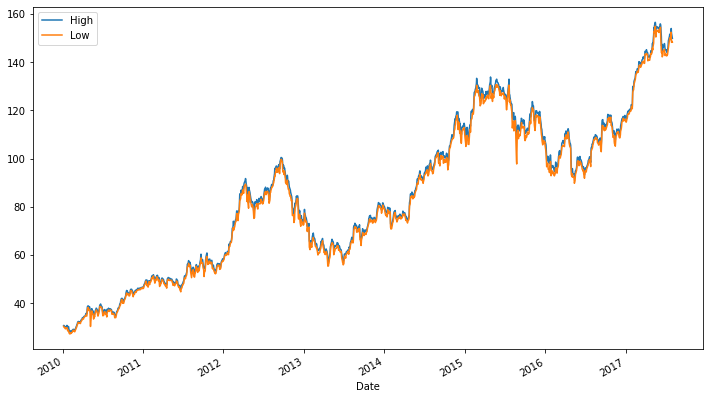

In [166]:
manzana.rolling(2)[['High', 'Low']].mean().plot();

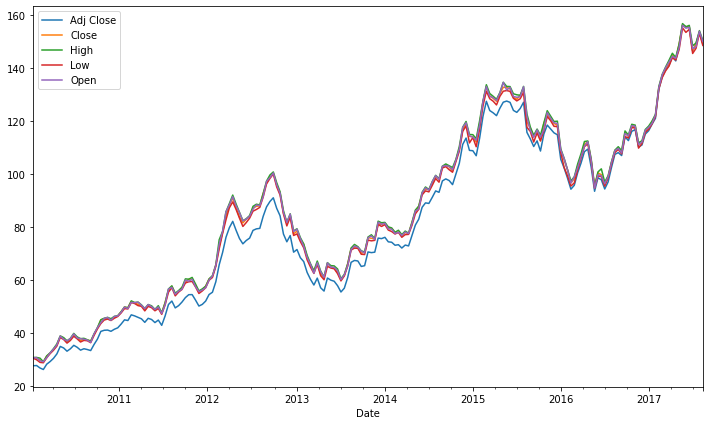

In [167]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

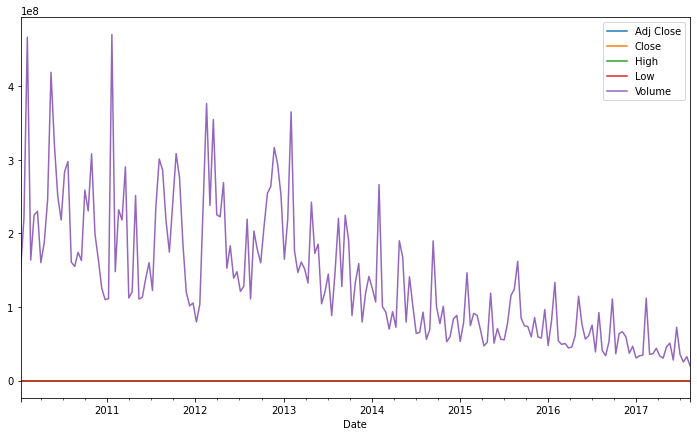

In [168]:
manzana.drop('Open', axis=1).resample('2W').max().plot();

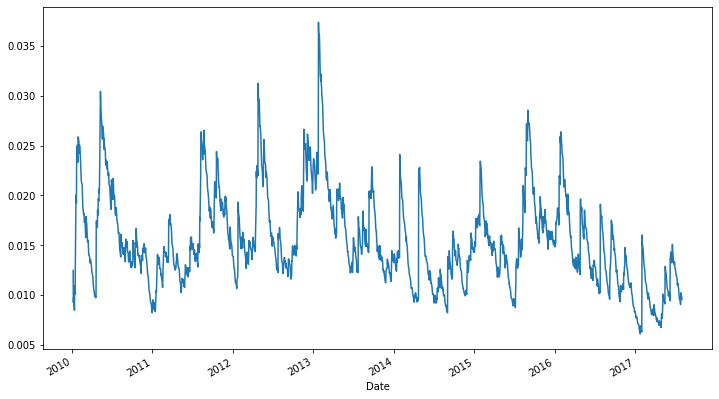

In [169]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

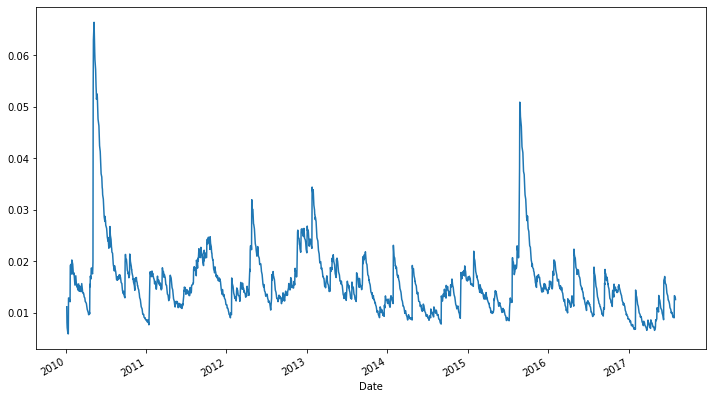

In [170]:
manzana['Low'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [171]:
import avocados

In [173]:
from avocados import read_avocadata

avocados = read_avocadata('2014', '2016') 
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [174]:
guacamole=read_avocadata('2015', '2017')
guacamole.tail()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
1938,2015-12-18 00:00:00+00:00,SOUTHWEST,GREENSKIN,False,48,0.16,0.16,0.16
1939,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,False,676,1.45,0.68,2.50
1940,2015-12-18 00:00:00+00:00,NORTHWEST,HASS,True,40,1.55,1.50,1.67
1941,2015-12-18 00:00:00+00:00,HAWAII,HASS,False,51,1.76,1.50,1.99
1942,2015-12-18 00:00:00+00:00,ALASKA,HASS,False,11,1.90,1.50,1.99


In [175]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [176]:
guacamole.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

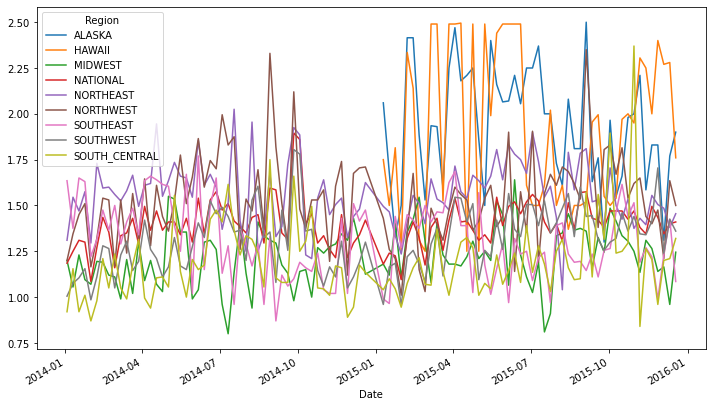

In [177]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

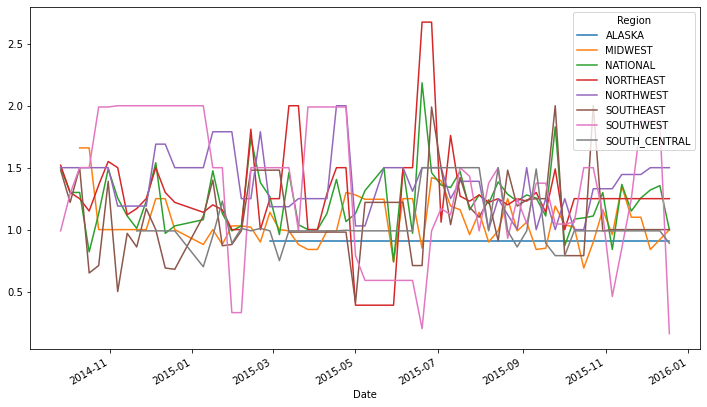

In [178]:
h=guacamole[guacamole.Variety=='GREENSKIN']
h.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [179]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

In [180]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


In [210]:
correlacion = organic_spread_by_region(h).corr()
correlacion =correlacion.drop('ALASKA',axis=1)
correlacion =correlacion.drop('ALASKA')
correlacion


Region,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,
MIDWEST,1.000000,0.326341,0.307174,0.289433,0.041748,-0.346672,0.166863
NATIONAL,0.326341,1.000000,0.417789,0.299378,0.021097,0.250812,0.401773
NORTHEAST,0.307174,0.417789,1.000000,0.400814,0.434013,-0.149993,0.248797
NORTHWEST,0.289433,0.299378,0.400814,1.000000,0.257435,-0.111115,0.004146
SOUTHEAST,0.041748,0.021097,0.434013,0.257435,1.000000,-0.090884,-0.081374
SOUTHWEST,-0.346672,0.250812,-0.149993,-0.111115,-0.090884,1.000000,0.179237
SOUTH_CENTRAL,0.166863,0.401773,0.248797,0.004146,-0.081374,0.179237,1.000000


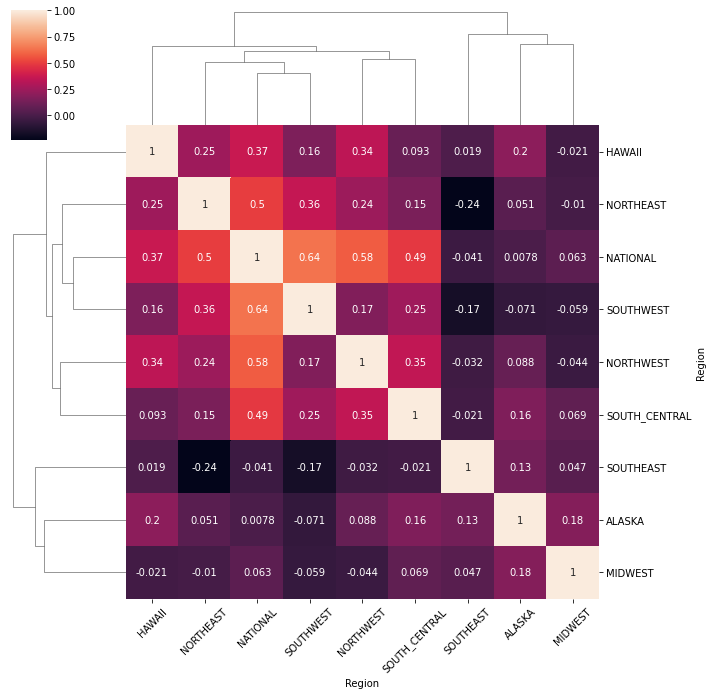

In [182]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

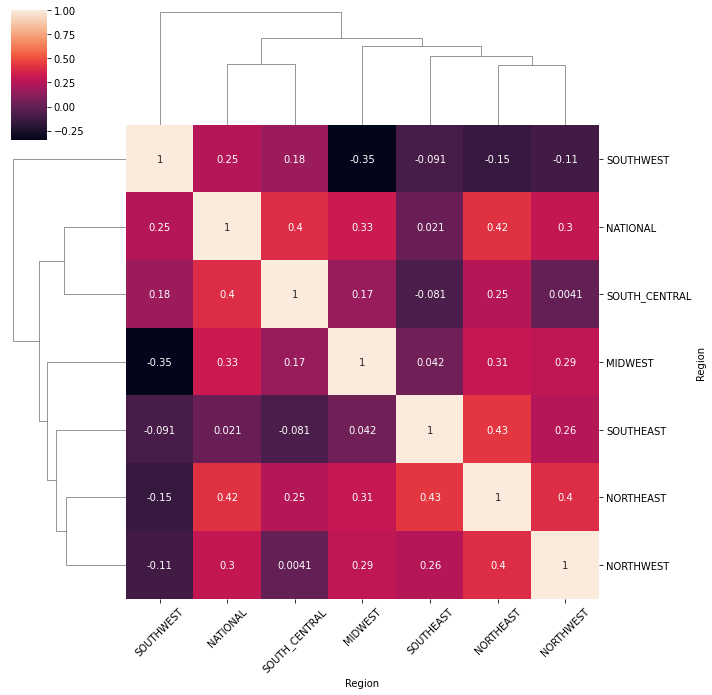

In [211]:
grid = sns.clustermap(correlacion, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!